#Unsupervised Learning for Outlier Detection
####The dataset contains information regarding earthquakes that have happened in past. The data, however, is not labeled, and therefore we are going to use unsupervised learning to find outliers in the data aka earthquakes. This will allow us to find the features that predict earthquakes the most.

Getting the necessary packages for outlier evaluation and selecting the correct directory to pull the data. Also, looking at the dataset and evaluating what information is in it.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

In [ ]:
os.chdir('Z:/ADS525')
os.getcwd()

'Z:\\ADS525'

In [ ]:
df1 = pd.read_csv('A3_data.csv')

In [ ]:
df1.head()

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,14720.0,33.0,-70.0,-79.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0,0,0,0
2,2,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,3,28820.0,171.0,-23.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0,0,0,0
4,4,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
df1.shape

(2584, 19)

In [ ]:
#No Null values for any feature
df1.isnull().sum()

index         0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
dtype: int64

In [ ]:
#Seeing if any features can easily be discarded
df1.describe()

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,1291.500000,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.349071,0.407121,0.643576,0.105263
std,746.080871,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.476769,0.527857,0.479035,0.342707
min,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,645.750000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1291.500000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1937.250000,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,1.000000,1.000000,1.000000,0.000000
max,2583.000000,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000,2.000000,1.000000,2.000000


With the describe function, we see that feature_9, feature_10, and feature_11 have no data in them, so they will not be useful, and therefore be dropped. Also, we want to normalize the data to make all features consistent with one another.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

df1 = df1.set_index('index') # this will ensure you don't lose the index values -- it is important that you always know the index, the answer asks you to provide the index.
df2 = pd.DataFrame(min_max_scaler.fit_transform(df1), columns=df1.columns, index=df1.index)
df2['index'] = df2.index

In [ ]:
df2 = df2.drop(labels=['feature_9','feature_10','feature_11'],axis=1)

In [ ]:
df2.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,index
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,0.034730,0.118817,0.080817,0.107611,0.095502,0.049197,0.056115,0.022575,0.004644,0.012376,0.010697,0.349071,0.203560,0.643576,0.052632,1291.500000
std,0.088305,0.124591,0.059895,0.067630,0.151624,0.097972,0.109959,0.093020,0.068001,0.050873,0.048394,0.476769,0.263928,0.479035,0.171354,746.080871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004454,0.041630,0.043997,0.064240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,645.750000
50%,0.009780,0.083481,0.067114,0.096360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1291.500000
75%,0.020317,0.147697,0.099925,0.135171,0.111111,0.125000,0.142857,0.000000,0.000000,0.006468,0.005000,1.000000,0.500000,1.000000,0.000000,1937.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2583.000000


Visualizing the data with IQR

A function that determines outliers (values that fall outside of the 25th and 75th percentile of the data).

In [ ]:
def out_iqr(df2 , column):
    global lower,upper
    q25, q75 = np.quantile(df2[column], 0.25), np.quantile(df2[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df4 = df2[df2[column] > upper]
    df5 = df2[df2[column] < lower]
    return print('Total number of outliers are', df4.shape[0]+ df5.shape[0])

In [ ]:
out_iqr(df2,'feature_0')

The IQR is 0.015862726589740132
The lower bound value is -0.019340313228410164
The upper bound value is 0.044110593130550366
Total number of outliers are 334


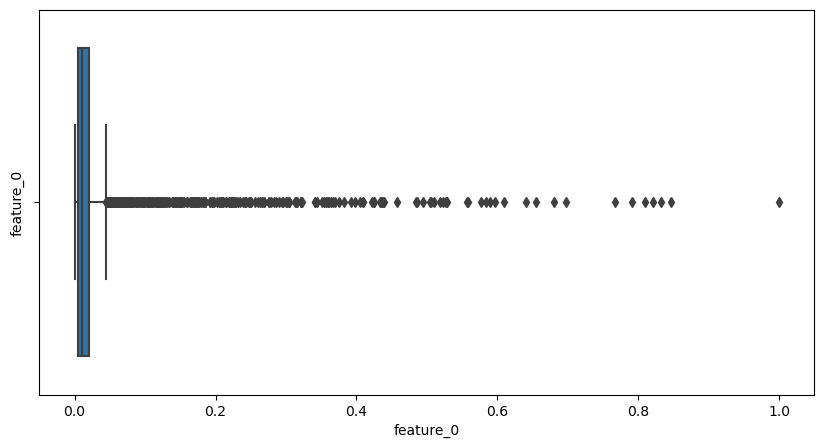

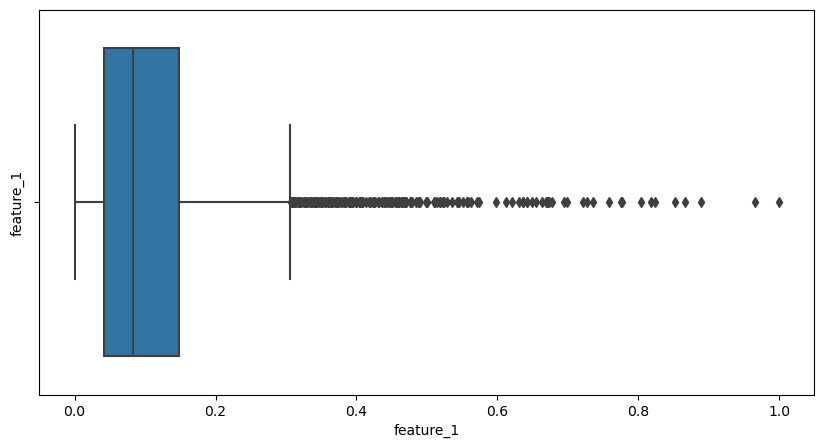

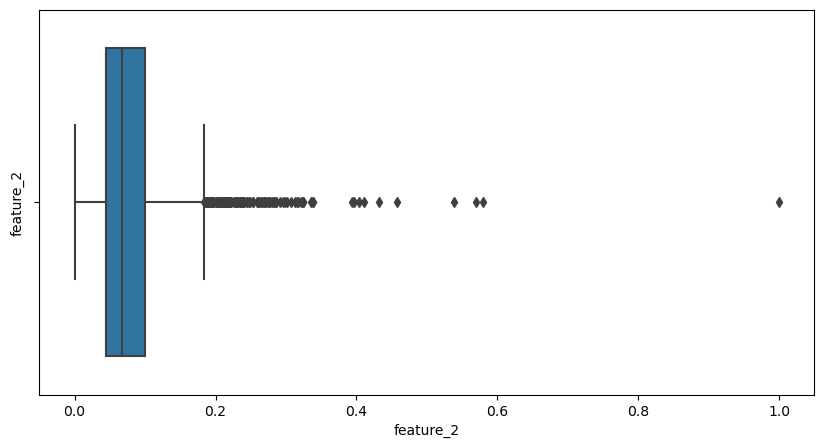

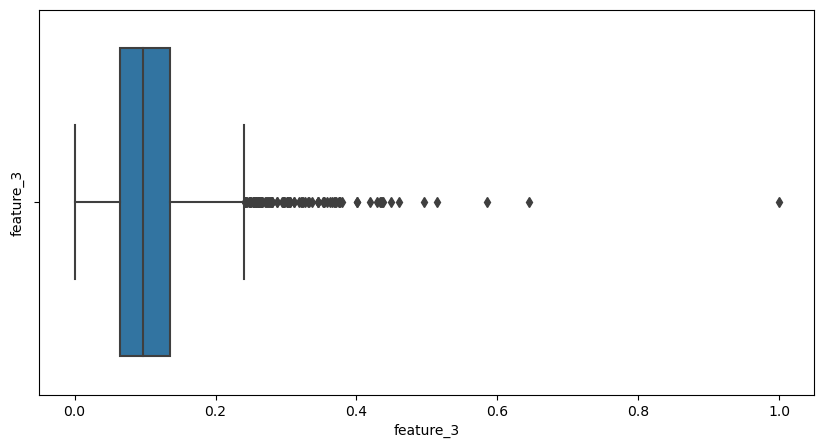

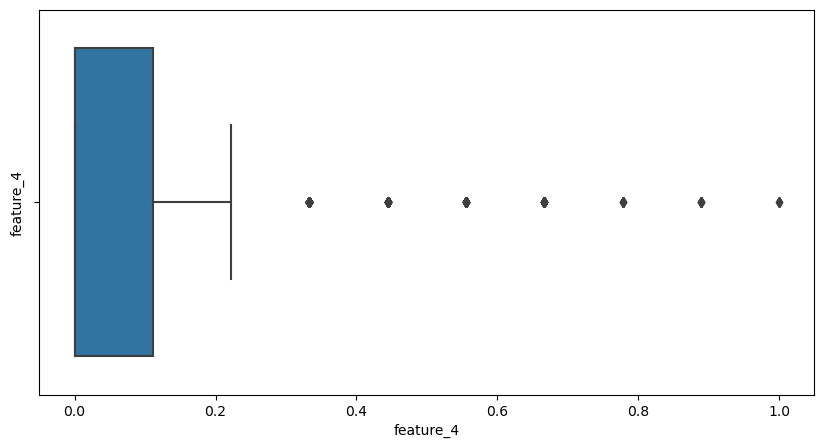

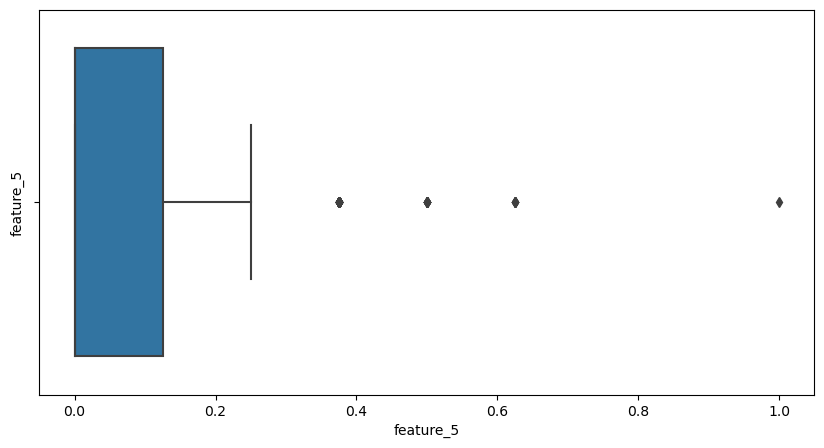

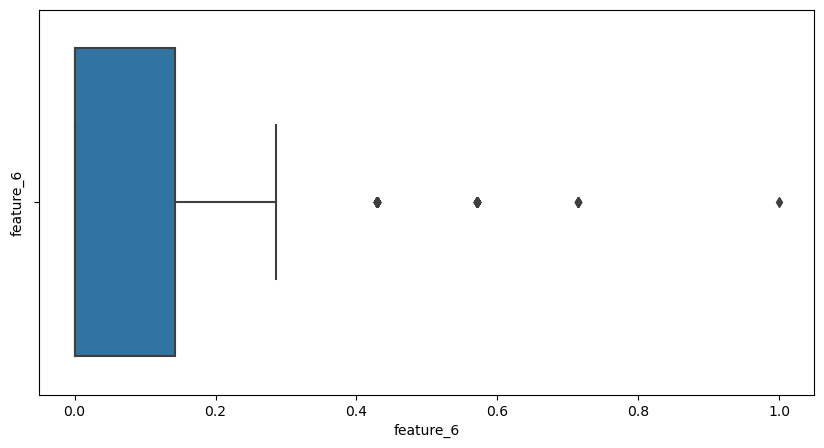

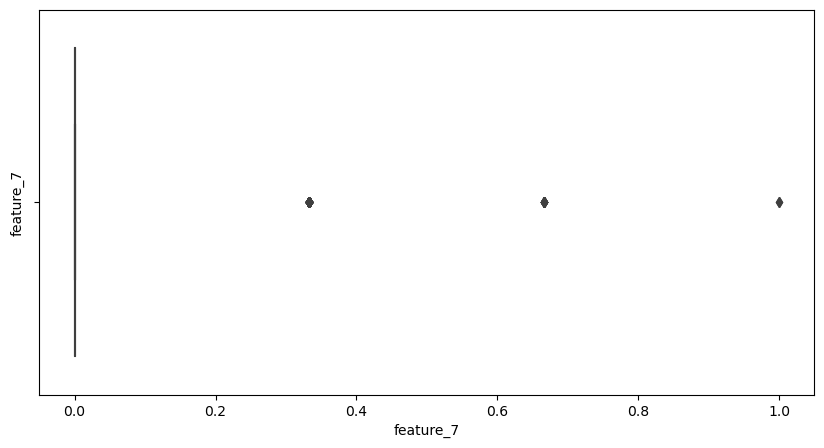

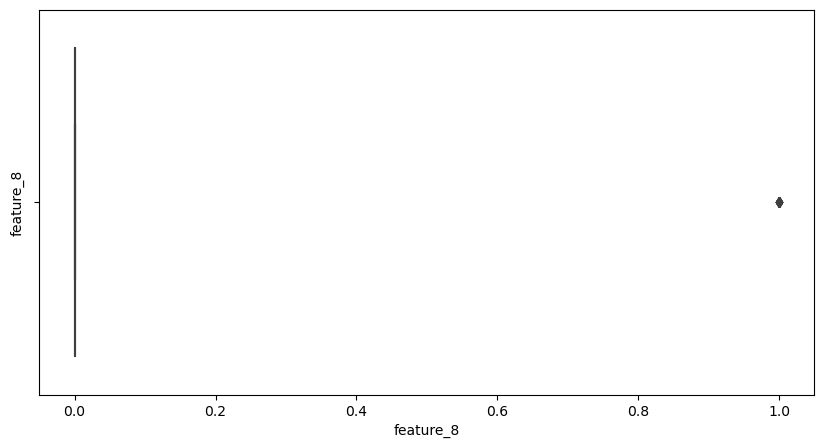

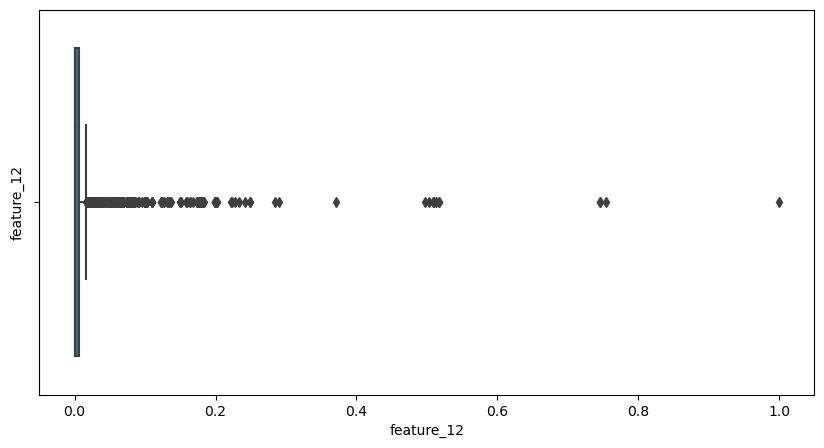

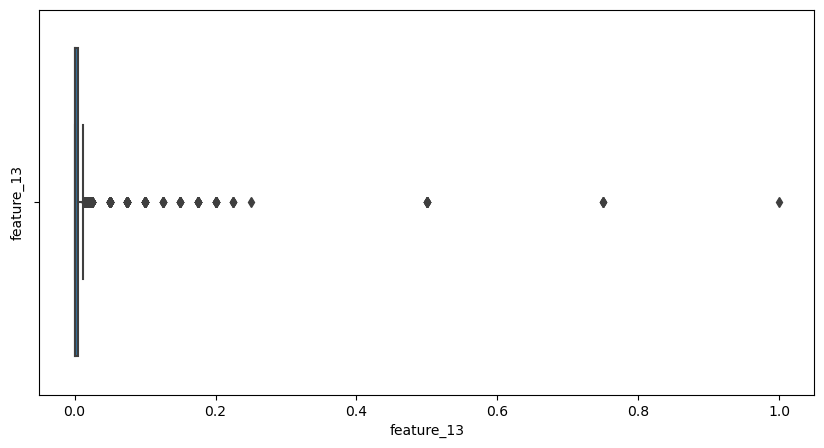

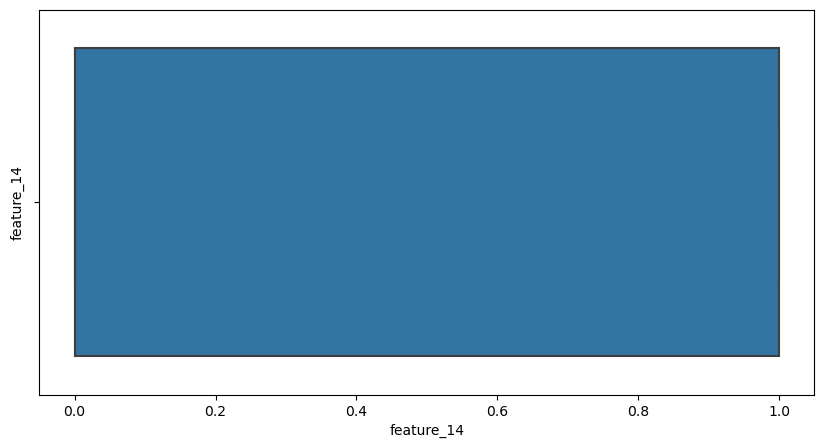

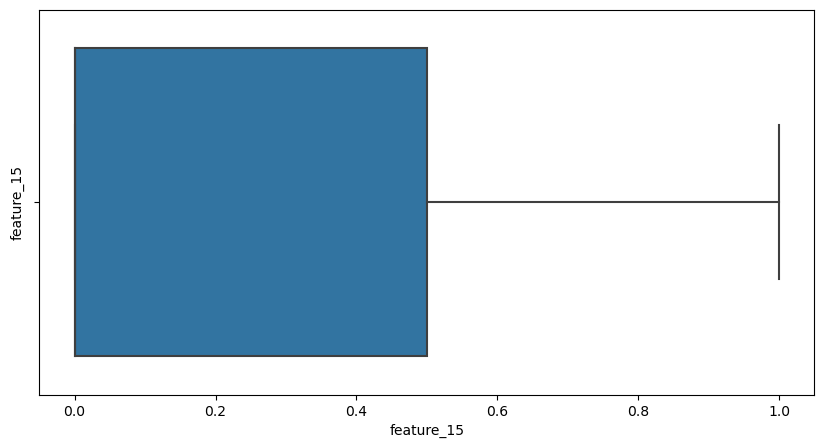

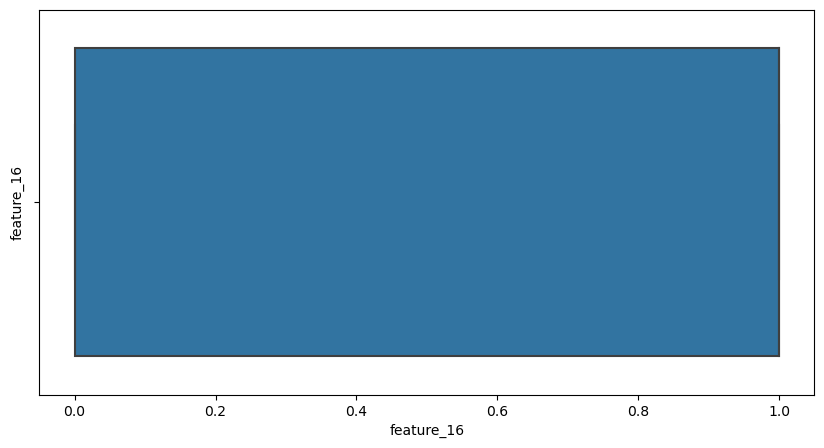

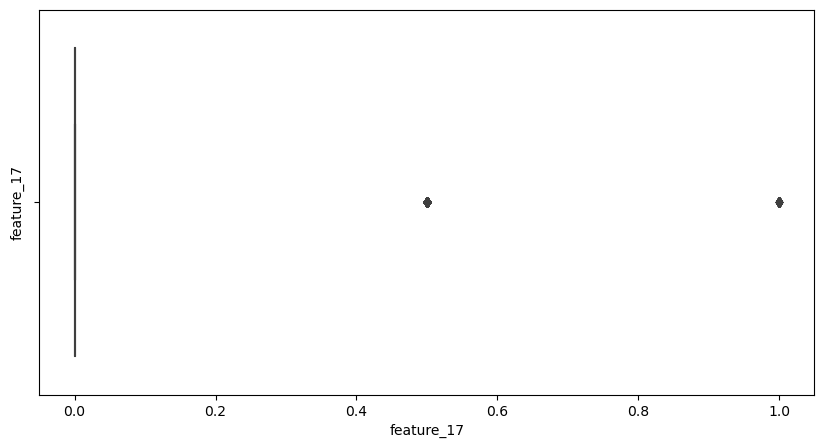

In [ ]:
for i in df2:
    if i != 'index':
        plt.figure(figsize=(10,5))
        plt.ylabel(i)
        sns.boxplot(x=df2[i])
        plt.show()

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


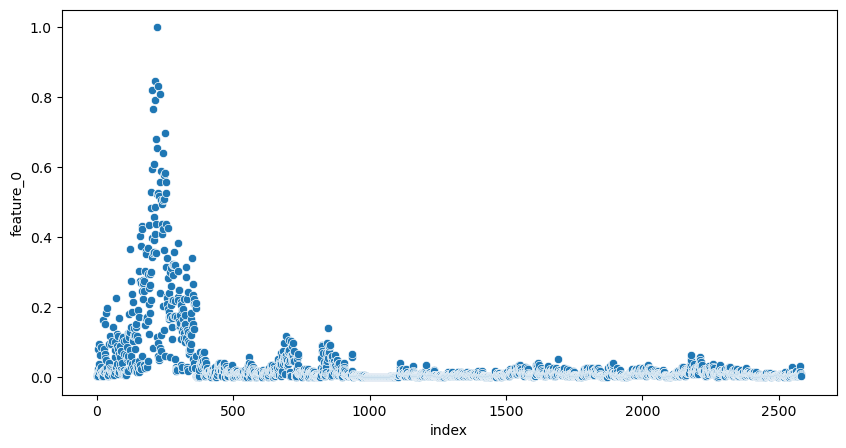

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


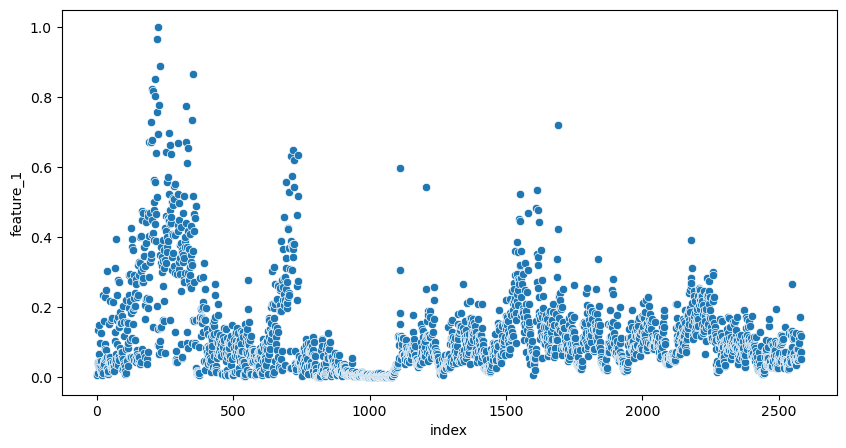

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


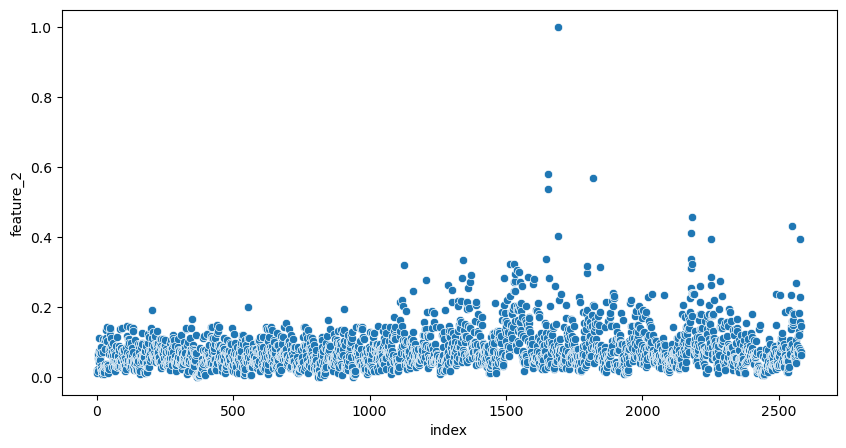

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


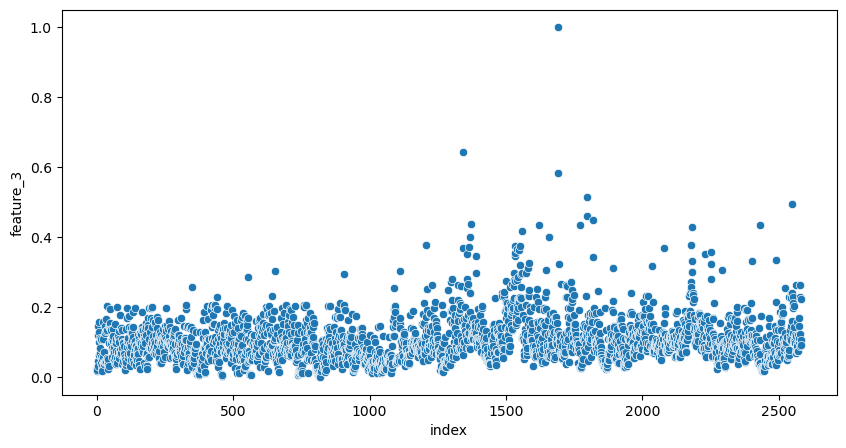

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


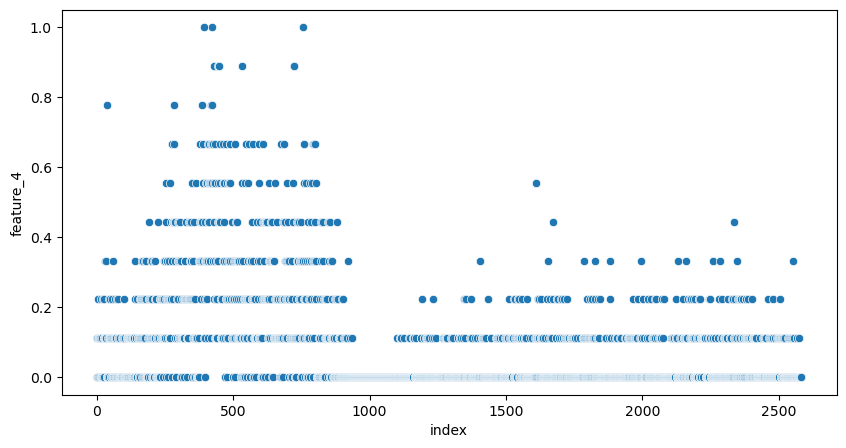

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


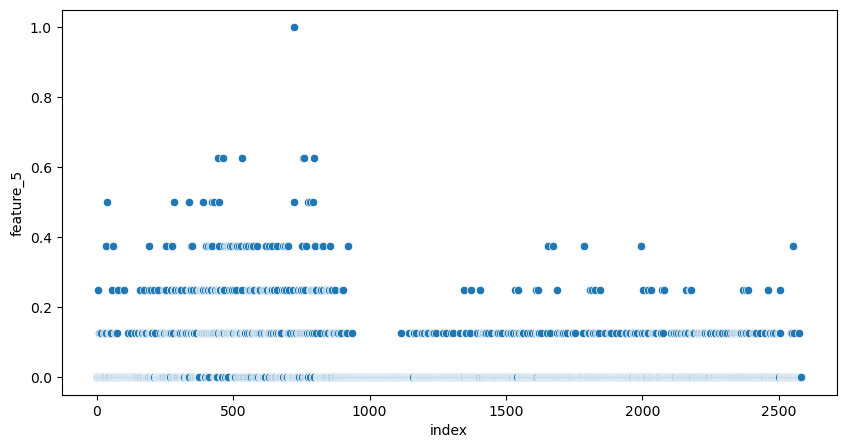

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


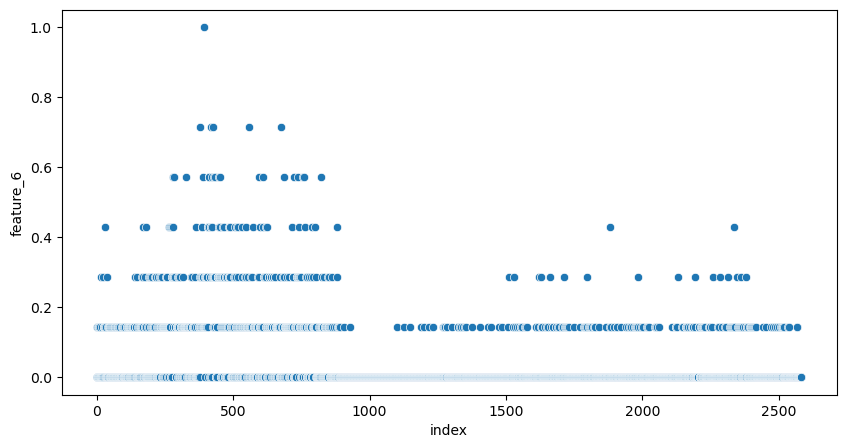

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


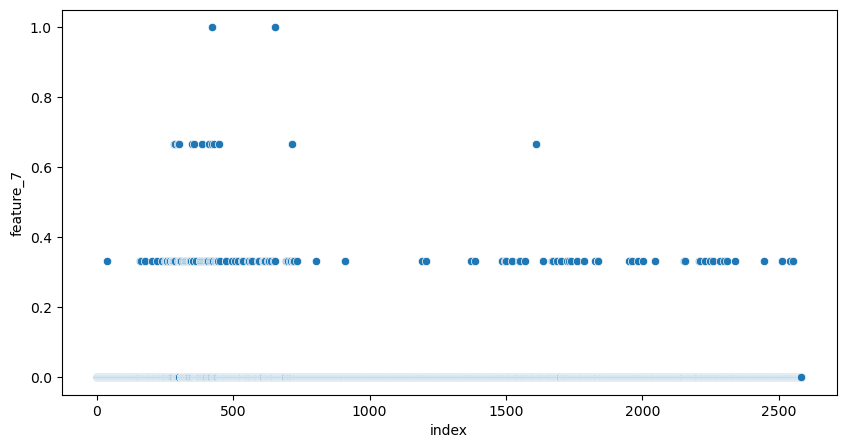

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


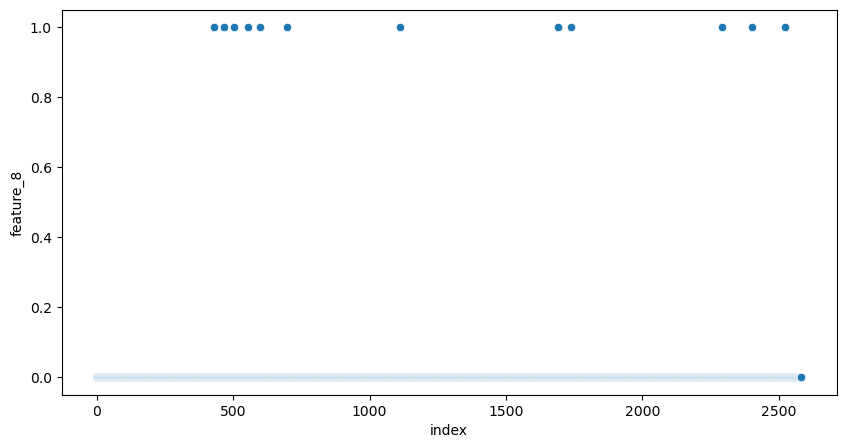

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


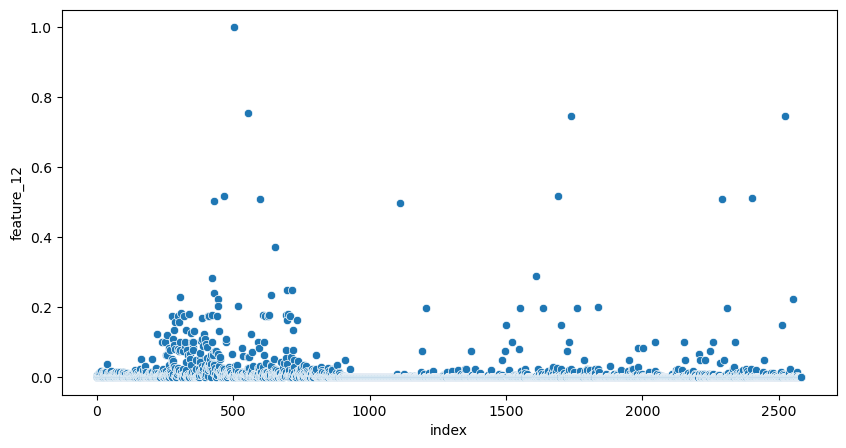

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


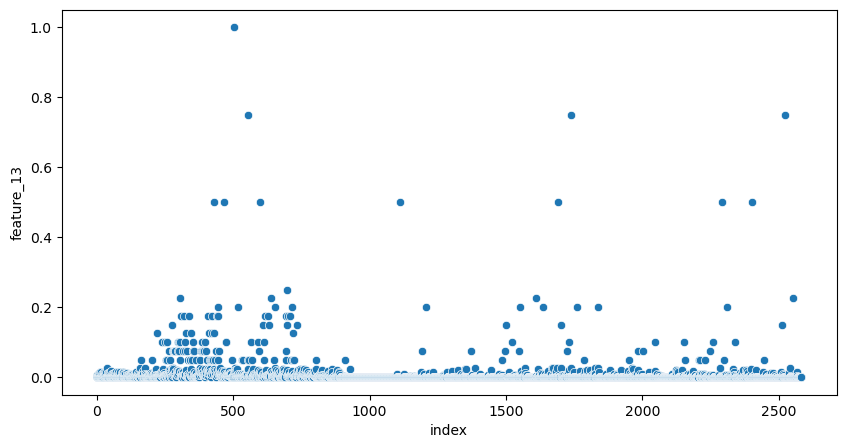

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


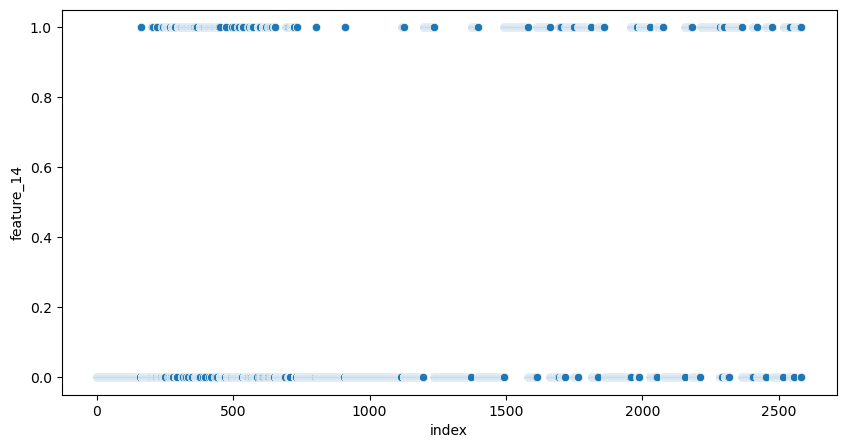

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


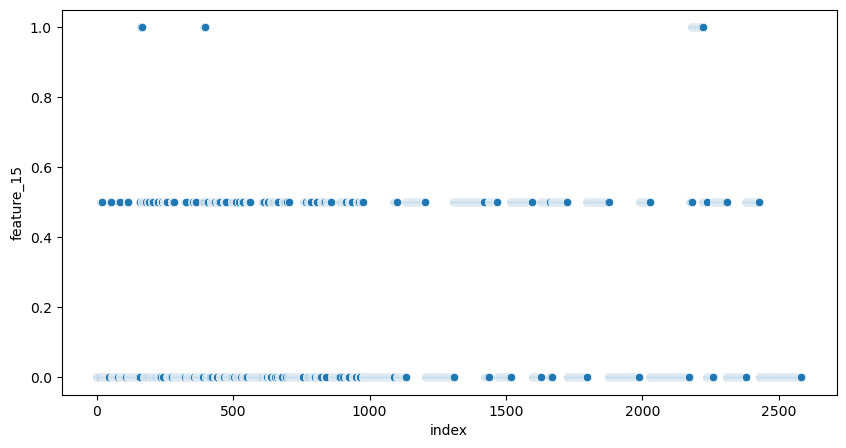

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


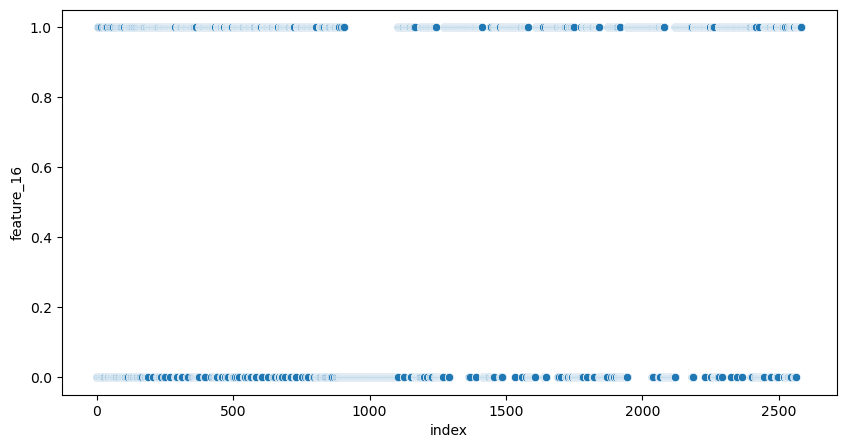

Z:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


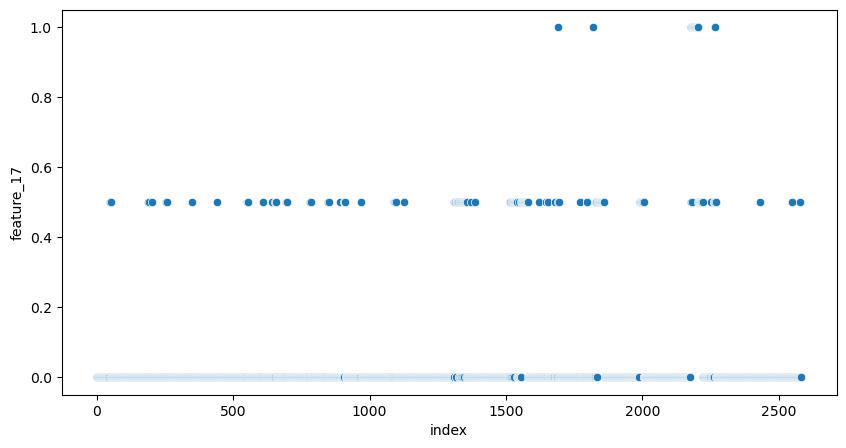

In [ ]:
for i in df2:
    if i != 'index':
        plt.figure(figsize=(10,5))
        plt.xlabel('index')
        plt.ylabel(i)
        sns.scatterplot(df2['index'], df2[i])
        plt.show()

A function that determines Z-score for each feature. Then, it finds the datapoints that fall outside of 3, labeling them as outliers.

In [ ]:
def out_zscore(df2):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(df2)
    std = np.std(df2)
    for i in df2:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are", len(outliers))

In [ ]:
for i in df2.columns:
    print(i)
    out_zscore(df2[i])
    print('-'*50)

feature_0
Total number of outliers are 69
--------------------------------------------------
feature_1
Total number of outliers are 56
--------------------------------------------------
feature_2
Total number of outliers are 42
--------------------------------------------------
feature_3
Total number of outliers are 41
--------------------------------------------------
feature_4
Total number of outliers are 81
--------------------------------------------------
feature_5
Total number of outliers are 77
--------------------------------------------------
feature_6
Total number of outliers are 68
--------------------------------------------------
feature_7
Total number of outliers are 158
--------------------------------------------------
feature_8
Total number of outliers are 12
--------------------------------------------------
feature_12
Total number of outliers are 46
--------------------------------------------------
feature_13
Total number of outliers are 38
-------------------------

Based on the data above (IQR and Z-score), features 14 and 16 have no outliers, therefore rendering them not useful in this situation.

In [ ]:
def find_repeat_values(temp_dict):
    repeats = []
    for key, value in temp_dict.items():
        index_list = value[0]
        for i in range(len(index_list)):
            if np.count_nonzero(index_list == index_list[i]) > 1:
                repeats.append(index_list[i])
    return repeats

In [ ]:
if __name__ == "__main__":
    temp_dict = {}
    for i in df2.columns:
        z = np.abs(stats.zscore(df2[i]))
        temp_dict[i] = np.where(z>3)
    repeats = find_repeat_values(temp_dict)
    print(repeats)

[]


In [ ]:
temp_dict

{'feature_0': (array([122, 155, 158, 161, 164, 166, 176, 179, 182, 188, 191, 197, 199,
         200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213,
         214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 229, 230, 233,
         234, 236, 238, 239, 240, 242, 243, 244, 245, 246, 247, 250, 251,
         252, 253, 254, 255, 257, 260, 269, 272, 278, 279, 282, 284, 287,
         296, 299, 327, 350], dtype=int64),),
 'feature_1': (array([ 191,  197,  200,  203,  204,  206,  208,  210,  212,  213,  215,
          218,  219,  221,  222,  223,  224,  229,  230,  254,  257,  260,
          263,  266,  269,  272,  275,  279,  282,  284,  287,  296,  299,
          303,  320,  326,  327,  329,  335,  350,  351,  353,  695,  704,
          713,  716,  719,  723,  724,  736,  737, 1111, 1207, 1550, 1613,
         1691], dtype=int64),),
 'feature_2': (array([1125, 1207, 1286, 1340, 1341, 1367, 1372, 1492, 1515, 1529, 1531,
         1532, 1533, 1540, 1549, 1550, 1582, 1598, 1603, 1646, 

Weeding out more unnecessary columns

In [ ]:
for key in temp_dict:
    if len(temp_dict[key][0]) < 5:
        print(key, len(temp_dict[key][0]))

feature_14 0
feature_16 0
index 0


In [ ]:
del temp_dict['index']
del temp_dict['feature_14']
del temp_dict['feature_16']

In [ ]:
set_of_outliers = []
for key in temp_dict:
    set_of_outliers.append(set(temp_dict[key][0]))

In [ ]:
set.intersection(*set_of_outliers)

set()

In [ ]:
find_repeat_values(temp_dict)

[]

### Okay, maybe there aren't intersections across the features. Best is we find what indexes are outliers in most number of features
### Thus it will be useful to have a count for each index, on how many features it is an outlier for

In [ ]:
list_of_indexes_that_are_outiers = set.union(*set_of_outliers)

In [ ]:
len(list_of_indexes_that_are_outiers)

442

## This is a good number to start with

In [ ]:
dict_index_outlier_count = {}

for index in list_of_indexes_that_are_outiers:
    dict_index_outlier_count[index] = 0
    for key in temp_dict:
        if index in temp_dict[key][0]:
            dict_index_outlier_count[index] += 1

In [ ]:
# sort the dictionary by value
sorted_dict_index_outlier_count = {k: v for k, v in sorted(dict_index_outlier_count.items(), key=lambda item: item[1], reverse=True)}
# let's remove the indexes that are outliers in only 2 feature
sorted_dict_index_outlier_count = {k: v for k, v in sorted_dict_index_outlier_count.items() if v > 3}

In [ ]:
sorted_dict_index_outlier_count

{1207: 6,
 1691: 6,
 284: 5,
 421: 5,
 445: 5,
 465: 5,
 1111: 4,
 2182: 4,
 2183: 4,
 275: 4,
 296: 4,
 350: 4,
 2402: 4,
 386: 4,
 411: 4,
 419: 4,
 422: 4,
 423: 4,
 428: 4,
 448: 4,
 1612: 4,
 618: 4,
 653: 4,
 716: 4,
 723: 4}

Here you can see that we have some index that are outliers in 6, few in 5, and many in 4 features

# Creating a chart that shows this information

In [ ]:
!pip install upsetplot

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for upsetplot: filename=UpSetPlot-0.8.0-py3-none-any.whl size=23532 sha256=d967724712c1139b4434da067690e164082e9c0dd94dc273d4e9c964e727323c
  Stored in directory: c:\users\zw915\appdata\local\pip\cache\wheels\e2\6f\1d\2d6fe3ae1a2907eea035ea8e1d27b8f8de1ede6ad268c2be5c
Successfully built upsetplot


In [ ]:
from upsetplot import plot
from upsetplot import from_memberships
from upsetplot import UpSet

In [ ]:
index_to_features_list = []

for idx in sorted_dict_index_outlier_count:
    current = []
    for feature in temp_dict:
        if idx in temp_dict[feature][0]:
            current.append(feature)
    index_to_features_list.append(current)

In [ ]:
data = from_memberships(index_to_features_list)

In [ ]:
data

feature_0  feature_1  feature_12  feature_13  feature_15  feature_17  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8
False      True       True        True        False       False       True       True       False      False      False      True       False        1
                                                                                                                             False      True         1
True       True       False       False       False       False       False      False      True       True       False      True       False        1
False      False      True        True        False       False       False      False      True       False      True       True       False        1
                                                                                                       True       False      True       False        1
                                                                                                   

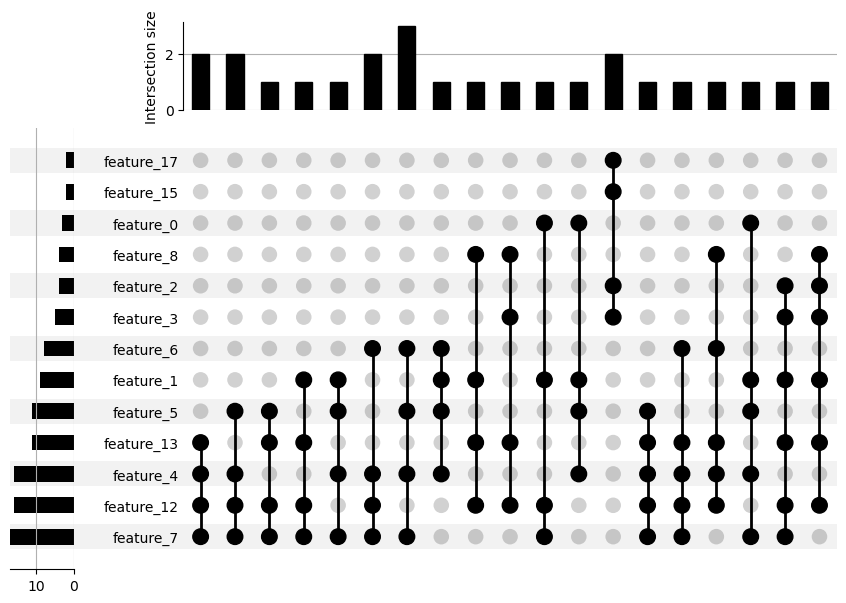

In [ ]:
upset = UpSet(data, subset_size='count', intersection_plot_elements=3)
upset.plot()
plt.show()

Based on this chart above, we see that there are 5 instances where 2 or more intersections happen ie 2 or more indexes that have these four features in common. Of those 5, we are ruling out the set that includes feature 17, 15, 2, and 3, as those features do not occur in any other section. Of the remaining 4 interactions that happen 2 or more times, features 4, 12, and 7 appear in all but 1 of the interactions, meaning that those features are the most important when predicting earthquakes based on this data. If we wanted to expand on this and include more features, we could add feature 5 which appears twice.

Using this knowledge, we can weed out all the unnecessary information figure out which index points are outliers.

In [ ]:
#This selects outliers that only have at least 4 features and also are outliers in them.
possible_outliers = list(sorted_dict_index_outlier_count.keys())

In [ ]:
print(possible_outliers)

[1207, 1691, 284, 421, 445, 465, 1111, 2182, 2183, 275, 296, 350, 2402, 386, 411, 419, 422, 423, 428, 448, 1612, 618, 653, 716, 723]


Then, we find the most useful features based on our possible outliers, proving our chart correct about features 7, 4, and 12.

In [ ]:
feature_outlier_strenth = {}
for feature in temp_dict:
    a = len(np.intersect1d(temp_dict[feature][0], possible_outliers))
    feature_outlier_strenth[feature] = a

In [ ]:
# sort dictionary by value
feature_outlier_strenth_sorted = {k: v for k, v in sorted(feature_outlier_strenth.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
feature_outlier_strenth_sorted

{'feature_7': 17,
 'feature_4': 16,
 'feature_12': 16,
 'feature_5': 11,
 'feature_13': 11,
 'feature_1': 9,
 'feature_6': 8,
 'feature_3': 5,
 'feature_2': 4,
 'feature_8': 4,
 'feature_0': 3,
 'feature_15': 2,
 'feature_17': 2}

Now that wehave proven that features 7, 4, and 12 are the most helpful when predicting earthquakes based on Z-Score, we will determine the actual index values that are earthquakes.

In [ ]:
good_features = list(feature_outlier_strenth_sorted.keys())[:3]

In [ ]:
good_features

['feature_7', 'feature_4', 'feature_12']

In [ ]:
indexes = [set(temp_dict[feature][0]) for feature in good_features]

In [ ]:
set.intersection(*indexes)

{386, 411, 421, 423, 428, 445, 653, 1612}